# EBA3500 Lecture 5: Multiple linear regression and quadratic regression


Our agenda  is:
1.   What's a regression model?
2.   Multiple regression
3.   An example multiple regression model
4.   Quadratic regression
5.   Summary


### **Definition:** Regression model
> Let $X$ be covariates, which may be *vector-valued*, and $Y$ a real-valued response. Then a regression model for $Y$ is
$$Y = f(X;\beta) + \epsilon,$$
where $\beta = (\beta_0, \beta_1, ..., \beta_{p})$ is an unknown parameter vector $\epsilon$ is an error term, and $f$ is the regression function.

We use the word *model* in two related sense.
* Like Bob, we may believe the model is actually true.
* Like Alice, we may pretend that it is true. The we minimize some distance such as the squared error or a proper scoring rule, or use maximum likelihood.


A regression model is *true* if the data $X$ and $Y$ has actually been generated from the regression model. For instance, the code below generates data from the regression model above. The function `f(x, beta)` has not been defined yet. Now we review some choices of `f(x, beta)` and introduce a new one. 

In [ ]:
# Does not run; need f, x, beta, and epsilon.
y = f(x, beta) + epsilon

#### **Example:** Simple linear regression
In the simple linear regression model we have $$Y = a + bX + u,$$
which may be written as $$Y = f(x;\beta) + \epsilon,$$
with 
* $f(x;\beta) = \beta_0 + \beta_1 x$, 
* $\epsilon = u$,
* $a = \beta_0$,  $b = \beta_1$.


In [ ]:
# Does not run!
f = lambda x, beta: beta[0] + beta[1] * x
beta = [1, 3] # Can be anything!
y = f(x, beta) + epsilon

NameError: ignored

#### Example: Simple non-linear regression
Recall the non-linear least squares routine, where we minimized 
$$\sum_{i=1}^n (y_i - f(x_i;\beta))^2$$
for some function $f(x_i;\beta)$ and $x_1, ..., x_n$ were real-valued data. The regression model associatiated with this problem is $Y = f(X;\beta) + \epsilon$.

In some cases, such as $f(x;\beta)=\frac{1}{1 + e^{-\beta_0 - \beta_1 x}}$, the non-linear regression model has its own name, simple logistic regression in this instance.

In [4]:
# Do not run!
x = np.linspace(-1, 1, 100) # Doesn't have to be this! 
epsilon = rng.uniform(-1, 1, 100) # Doesn't have to be this!
y = f(x, beta) + epsilon

NameError: ignored

***Note:*** Some would could also call e.g. $Y = f(X;\beta)\epsilon$ a regression model. This model has a multiplicative in the error term, a phenomenon we covered in the lecture on logarithmic transforms. We will stick to the model with additive error terms, however. Suckers for general definitions would use $Y = f(x,\epsilon;\beta)$! (For instance $f(x, \epsilon; \beta) = \beta_0 x ^ {\beta_1 \epsilon} \epsilon$.)

In [1]:
f = lambda x, epsilon, beta: beta[0] * x ** (beta[1] * epsilon) * epsilon 

In [8]:
import numpy as np

x1 = np.linspace(-1, 1, 100) # Doesn't have to be this!
x2 = np.linspace(-3, 3, 100) ** 2
# We have two vectors!

[-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61616162  0.63636364  0.

## Multiple regression
This is all familiar our covariate data is *univariate*. This means we have only vector of `x` of covariates, not two or more. Then non-linear regression model in the the previous example is as general as a regression model gets. But if we have more than one vectors of covariaties, e.g. `x_1, x_2, x_3`, we will use *multiple regression*.



### **Definition:** Multiple linear regression
Let $x_1, x_2, ..., x_p$ be $p$ covariates. The multiple linear regression model of $Y$ on $x$ is
$$Y = \beta_0 + \beta_1 x_1 + ... + \beta_p x_p + \epsilon.$$

The parameters $\beta$ are often called *regression coefficients*.



### Estimated regression coefficients.
We will have to estimate the regression coefficients $\beta$ using some method, usually least squares. Even if the model is true, we won't recover the true regression coefficients exactly, but obtain mere approximations. They are called the estimated regression coefficients, and are denoted $\hat{\beta}_i$.



### Lines, planes, and hyperplanes
Geometrically, $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2$ defines a *plane* in three dimensions. The geometric inuition is true for all numbers of covariates.

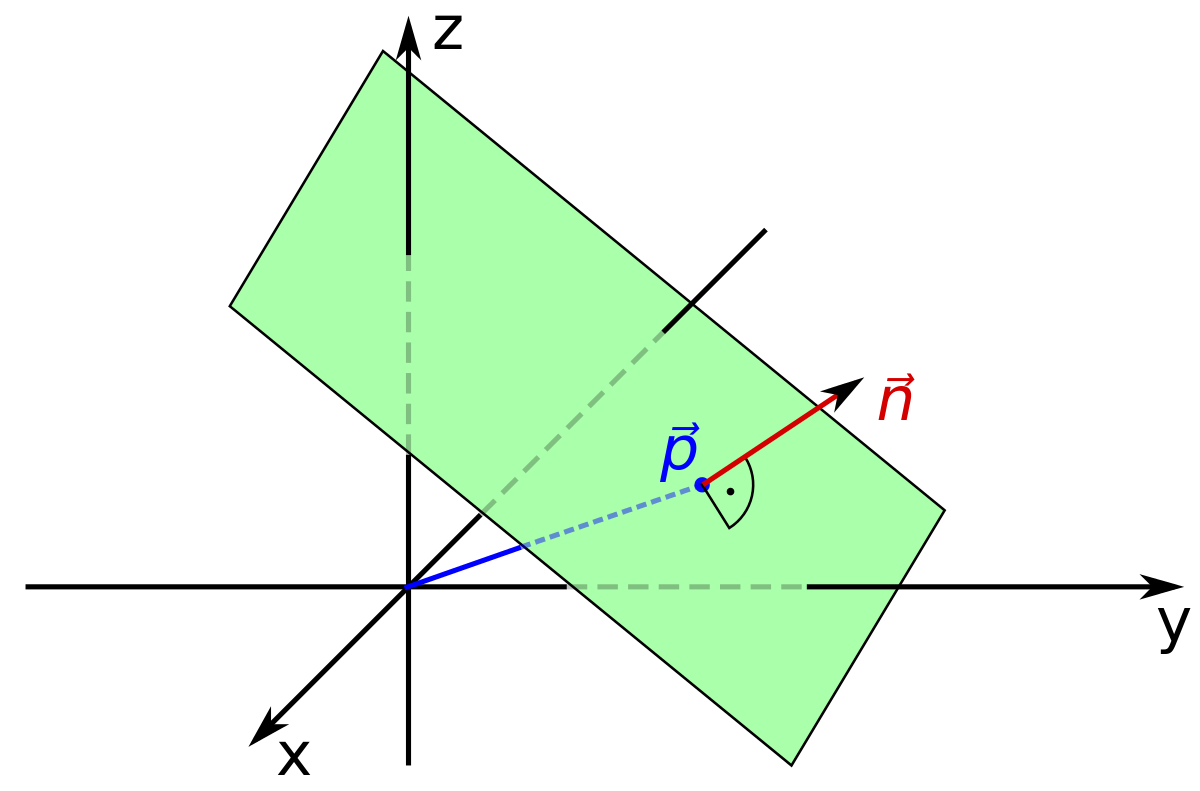

*  1 covariate, **lines:** Unusually easy to visualize and understand.
*  2 covariates, **planes:** ["Flat, two-dimensional surfaces that extends infinitely far".](https://en.wikipedia.org/wiki/Plane_(geometry)) Easy to visualize, easy to understand.
*  More covariates, **hyperplanes:** Hard or impossible to visualize, quite easy to undestand.

We care about the geometric intuiting since it helps us understand what we are doing.



## Marketing: Regression in two dimensions
We will use the package `statsmodels.formulas.api` and he data set `marketing`from the R package datarium. 

> A data frame containing the impact of three advertising medias (youtube, facebook and newspaper) on sales. Data are the advertising budget in thousands of dollars along with the sales (in thousands of units). The advertising experiment has been repeated 200 times. This is a simulated data (sic!).

In [11]:
# !pip install pyreadr
import pyreadr
marketing_url = 'https://github.com/kassambara/datarium/blob/master/data/marketing.rda?raw=true'
marketing_file = pyreadr.download_file(marketing_url, "marketing.rda")
marketing = pyreadr.read_r(marketing_file)["marketing"]
marketing.head() # head "method"! this is important. (a.b() => b is method)

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48


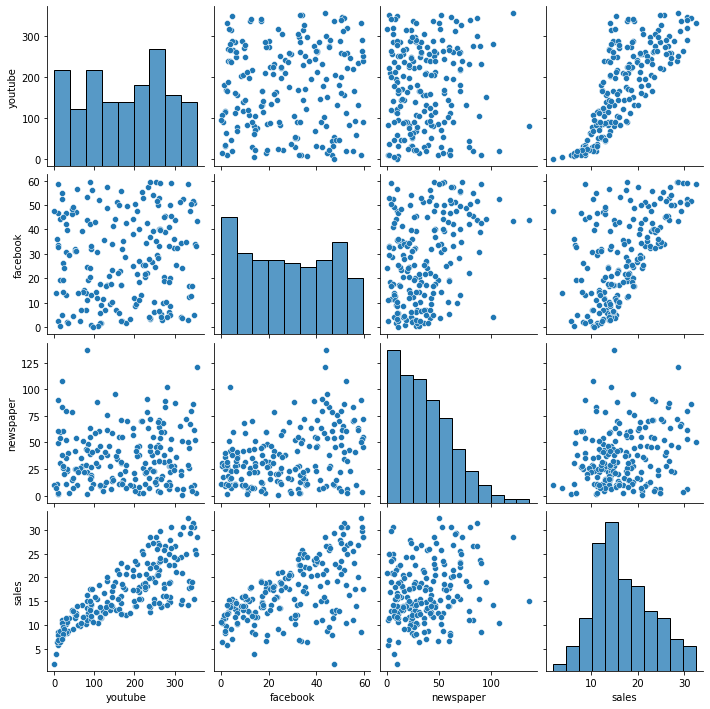

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(marketing)
plt.show()

In [12]:
marketing.corr() ** 2 # Correlation squared = R^2!

,youtube,facebook,newspaper,sales
youtube,1.000000,0.003004,0.003209,0.611875
facebook,0.003004,1.000000,0.125389,0.332032
newspaper,0.003209,0.125389,1.000000,0.052120
sales,0.611875,0.332032,0.052120,1.000000


Now we will have a look at $sales = \beta_0 + \beta_1 * youtube + \beta_2 * facebook + \epsilon$. We will use least squares!

In [16]:
import statsmodels.formula.api as smf
fit = smf.ols("sales ~ youtube + facebook", data = marketing).fit()
fit.summary() # summary() is a method that presents a lot of info!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           4.83e-98
Time:                        08:29:04   Log-Likelihood:                -422.66
No. Observations:                 200   AIC:                             851.3
Df Residuals:                     197   BIC:                             861.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5053      0.353      9.919      0.000       2.808       4.202
youtube        0.0458      0.001     32.909      0.000       0.043       0.048
facebook       0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         510.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The $R^2$ of this model is $0.897$! That's much more than $0.61$. Both of these are much larger than they would be in reality!

In [ ]:
fit.params

Intercept    3.505320
youtube      0.045755
facebook     0.187994
dtype: float64

In [20]:
marketing.max()

youtube      355.68
facebook      59.52
newspaper    136.80
sales         32.40
dtype: float64

In [ ]:
marketing.min()

youtube      0.84
facebook     0.00
newspaper    0.36
sales        1.92
dtype: float64

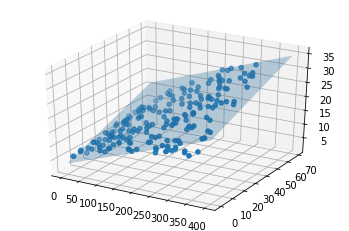

In [ ]:
# My task: Plot a plane from the regression equation.
#   Then add a scatterplot.
#   https://stackoverflow.com/questions/36060933/matplotlib-plot-a-plane-and-points-in-3d-simultaneously
# create the figure
fig = plt.figure()

# add axes
ax = fig.add_subplot(111, projection='3d')

xx, yy = np.meshgrid(range(400), range(70))

zz = fit.params[0] + fit.params[1] * xx + fit.params[2] * yy

# plot the plane
ax.plot_surface(xx, yy, zz, alpha=0.3)
ax.scatter(marketing["youtube"], marketing["facebook"], marketing["sales"]);
plt.show()

It's hard to see how well the plane fits the points. To make it easier, we will plot the *residuals*. The residuals of a fitted regression model $f(x;\beta)$ are defined as
$$r_i = y_i - f(x_i,\beta).$$
This is the signed distance between $y_i$ and its prediction (fitted value) $f(x_i,\beta)$. We use them in multiple regression since it's hard to visualize $f(x;\beta)$ -- even in two dimensions!

In [26]:
dir(fit)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


In [ ]:
fit.resid

0      1.853442
1     -2.334435
2     -3.644421
3      1.059461
4     -0.388690
         ...   
195    2.682585
196    1.857150
197    0.038342
198    2.048492
199   -2.109051
Length: 200, dtype: float64

We usually plot the residuals versus either the fitted value $f(x_i,\beta)$ or versus the observed value $y_i$.

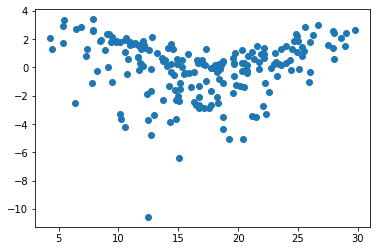

In [27]:
plt.scatter(fit.fittedvalues, fit.resid)

The residuals are clearly related to the fitted values, which indicates that the linear regression model is wrong. This shouldn't come as a surprise, considering the `sns.pairplot` above.

In [32]:
fit = smf.ols("sales ~ youtube + np.log(youtube) + facebook", data = marketing).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     943.4
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          3.54e-116
Time:                        08:55:19   Log-Likelihood:                -376.46
No. Observations:                 200   AIC:                             760.9
Df Residuals:                     196   BIC:                             774.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.5864      0.893     -6.257      0.000      -7.347      -3.825
youtube             0.0226      0.002      9.312      0.000       0.018       0.027
np.log(youtube)     2.6633      0.248     10.729      0.000       2.174       3.153
facebook            0.1970      0.006     30.526      0.000       0.184       0.210
==============================================================================
Omnibus:                        0.703   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.704   Jarque-Bera (JB):                0.588
Skew:                           0.133   Prob(JB):                        0.745
Kurtosis:                       3.015   Cond. No.                     1.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

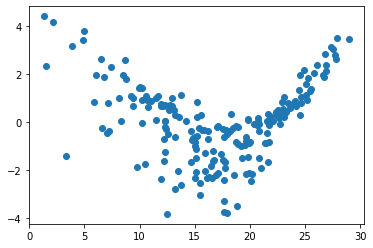

In [33]:
plt.scatter(fit.fittedvalues, fit.resid)

In [34]:
np.log(0) # We don't want this1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [35]:
fit = smf.ols("sales ~ youtube + np.log(youtube) + facebook + np.log(facebook + 0.5)", data = marketing).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     727.4
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          5.93e-116
Time:                        08:57:09   Log-Likelihood:                -373.39
No. Observations:                 200   AIC:                             756.8
Df Residuals:                     195   BIC:                             773.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -4.5795      0.971     -4.714      0.000      -6.495      -2.664
youtube                    0.0227      0.002      9.477      0.000       0.018       0.027
np.log(youtube)            2.6729      0.245     10.905      0.000       2.189       3.156
facebook                   0.2304      0.015     15.380      0.000       0.201       0.260
np.log(facebook + 0.5)    -0.6663      0.270     -2.467      0.015      -1.199      -0.134
==============================================================================
Omnibus:                        1.635   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                1.562
Skew:                          -0.215   Prob(JB):                        0.458
Kurtosis:                       2.958   Cond. No.                     1.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

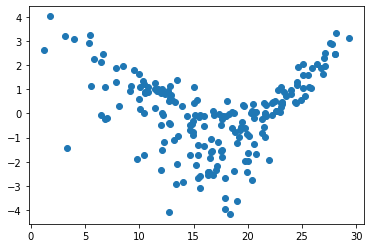

In [ ]:
plt.scatter(fit.fittedvalues, fit.resid)

### $R^2$ again
The $R^2$ for multiple regression is sometimes called the multiple $R^2$. It is defined as 
$$
1 - \frac{\sum_{i=1}^n (y_i - (\hat{\beta_0} + \hat{\beta_1} x_{1i} + \hat{\beta_2} x_{2i} + ... + \hat{\beta_p} x_{pi}))^2}{\sum_{i=1}^n (y_i - \overline{x})^2}.
$$

The interpretation should be familiar by now.

### Interpretation
The parameters $\beta_i$ in a linear regression model have a pretty straight-forwar interpretation. 

Letting be $x_1$ fixed, let's take a look at what happens when $x_2$ changes to $x_2'$: 
$$
\beta_0 + \beta_1 x_1 + \beta_2 x_2 - (\beta_0 + \beta_1 x_1 + \beta_2 x_2') =  \beta_2 (x_2' - x_2).
$$

If $x_2' = x_2 + 1$, then 

$$
\beta_0 + \beta_1 x_1 + \beta_2 (x_2 + 1) - (\beta_0 + \beta_1 x_1 + \beta_2 x_2) =  \beta_2 (x_2 + 1 - x_2) = \beta_2.
$$

Hence for every increase of $1$ in $x_2$, keeping the other covariates constant, the regression function will increase by $\beta_2$. This interpretation holds for any $\beta_i$ in any multiple regression model, not just when the number of covariates is $2$. 

Another interpretation is in terms of partial derivatives. When 
$$f(x,\beta) = \beta_0 + \beta_1 x_1 + ... + \beta_p x_p,$$
we have that
$$
\frac{\partial f(x,\beta)}{\partial x_i} = \beta_i.
$$

Hence $\beta_i$ can be interpreted as the partial rate of increase in the regression function.


### Interpretation in marketing
It seems like the value of investing $1$ more on `facebook` advertising is, in expectation, about $4$ times that of `youtube` advertising! Keeping everything else constant. Good to know: It suggests you should preferentially spend your money on `facebook` (But remember that the data is simulated, so there's no insight here. Moreover, we cannot say anything about causality here.) 

When you're making business decisions, these are the kind of things you care about -- the expected utiltiy of doing $A$ vs. $B$. Since the correlation and $R^2$ are standardized we cannot make decisions based on them. 

In [ ]:
fit = smf.ols("sales ~ youtube + facebook", data = marketing).fit()
fit.params

Intercept    3.505320
youtube      0.045755
facebook     0.187994
dtype: float64

In [ ]:
marketing.corr()**2

,youtube,facebook,newspaper,sales
youtube,1.000000,0.003004,0.003209,0.611875
facebook,0.003004,1.000000,0.125389,0.332032
newspaper,0.003209,0.125389,1.000000,0.052120
sales,0.611875,0.332032,0.052120,1.000000


Let's add the `newspaper` variable to the mix:


In [ ]:
fit = smf.ols("sales ~ youtube + facebook + newspaper", data = marketing).fit()
fit.params

Intercept    3.526667
youtube      0.045765
facebook     0.188530
newspaper   -0.001037
dtype: float64

Appears that newspaper ads have no relationsship with sales when we take `youtube` and `facebook` into account.


## Quadratic regression



### Review of quadratic functions
The function $f(x) = c + bx + ax^2$ is called a quadratic function or second-degree polynomial. It takes on four kinds of shapes, depending on the value of $a,b,c$. 

In [45]:
# Goal: To plot 9 curves in the same window, using a grid.
# 1 2 3
# 4 5 6
# 7 8 9
# (just like the pairplot)
# I want the plots to show the quadratic curve for c = 0 (for all of them)
# and all combinations of (-1, 0, 1) for the rest (a, b).

from itertools import product # We'll see how this works below.
# https://docs.python.org/3/library/itertools.html#itertools.product
params = np.array(list(product([-1, 0 ,1], [-1,0,1])))
print(params)


[[-1 -1]
 [-1  0]
 [-1  1]
 [ 0 -1]
 [ 0  0]
 [ 0  1]
 [ 1 -1]
 [ 1  0]
 [ 1  1]]


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = np.linspace(-3, 3, 100)


In [48]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, optional, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (`sharex`) or y (`sharey`)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a col

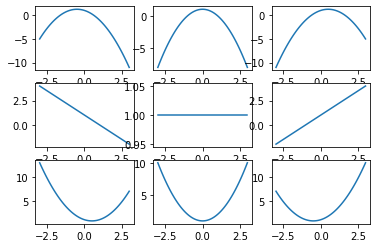

In [47]:
c = 1
f = lambda x, a, b, c: c + b * x + a * x ** 2
# Let's plot it now.
fig, axs = plt.subplots(3, 3)
for (a, b), (i, j) in zip(params, product(range(3), range(3))):
  axs[i, j].plot(x, f(x, a, b, c))

In [55]:
list(zip([0,1,2], [3,2,1]))

[(0, 3), (1, 2), (2, 1)]

In [56]:
for (a, b, c) in zip([0,1,2], [3,2,1], [99, 1, 444]):
  print(a * b - c)

-99
1
-442


In [58]:
list1 = [0,1,2]
list2 = [3,2,1]
list3 = [99, 1, 444]
for i in range(3):
  print(list1[i] * list2[i] - list3[i])

-99
1
-442


In [60]:
list(product(range(3), range(3)))

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

-1 -1 0 0
-1 0 0 1
-1 1 0 2
0 -1 1 0
0 0 1 1
0 1 1 2
1 -1 2 0
1 0 2 1
1 1 2 2


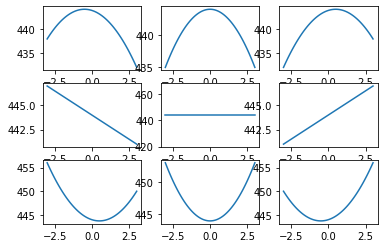

In [64]:
list(zip(params, product(range(3), range(3))))
fig, axs = plt.subplots(3, 3)
for (a, b), (i, j) in zip(params, product(range(3), range(3))):
  axs[i, j].plot(x, f(x, a, b, c))
  print(a, b, i, j)

### Quadratic regression as linear regression
Let the true data generating model be
$$Y = \beta_0 + \beta_1X + \beta_2X^2 + \epsilon.$$
This a *quadratic regression model*. It can be regarded as a kind of non-linear regression model, but it usually isn't. How come. 

Define $X_1 = X$ and $X_2 = X^2$. Then 
$$\beta_0 + \beta_1X + \beta_2X^2 = \beta_0 + \beta_1X_1 + \beta_2X_2,$$
which implies that the quadratic regression model is actually a multiple linear regression model!

Why do we care? Because linear regression is much easier to compute than non-linear regression!

Tricks such as this are remarkably common, and allow us to fit more than planes using the multiple regression model. Multiple linear regression is linear in the parameters, not the always the covariates.



### Is this a good idea?
1.  Quadratic functions have a very specific shape.
2.  But few natural phenomena adhere to this shape -- except if you know they do (physics!)
3.  Often used by social scientists when data isn't completely linear. And if the relationsship between y and x isn't linear, a quadratic regression will always fit better in terms of e.g. the $R^2$.
4.  Sometimes relationsships "flatten out", and the quadratic curve will give a wrong impression.



### An example of quadratic regression
Let's take a look at some data from the following article, published in the highly prestiguous Psychological science.

> Swaab, R. I., Schaerer, M., Anicich, E. M., Ronay, R., & Galinsky, A. D. (2014). The too-much-talent effect: team interdependence determines when more talent is too much or not enough. Psychological Science, 25(8), 1581–1591. https://doi.org/10.1177/0956797614537280

This article is partly about football, reportedly "a simple game; 22 men chase a ball for 90 minutes and at the end, the Germans win."

The abstract of this paper reads:
> Five studies examined the relationship between talent and team performance. Two survey studies found that people believe there is a linear and nearly monotonic relationship between talent and performance: Participants expected that more talent improves performance and that this relationship never turns negative. However, building off research on status conflicts, we predicted that talent facilitates performance—but only up to a point, after which the benefits of more talent decrease and eventually become detrimental as intrateam coordination suffers. 

So the authors claim there is no increasing relationsship between talent and performance at the top level. That seems plausible considering e.g. Martin Ødegaard!

They did four studies, as is common in psychology, and we will look at one of the football studies. Have a look at the paper for more details.



In [65]:
url = "https://gist.githubusercontent.com/JonasMoss/ae5436bf951da5b3e723ce6fec39e77f/raw/03148a170130686d95f020b81e27bc14b35705ff/talent.csv"
talent = pd.read_csv(url)
talent.head()

,Unnamed: 0,country,points,talent
0,1,Spain,1485,85
1,2,Germany,1300,76
2,3,Brazil,1242,48
3,4,Portugal,1189,16
4,5,Argentina,1175,35


Here `points` quantifies the performance of the national team, and `talent` is a measurement of talent. 

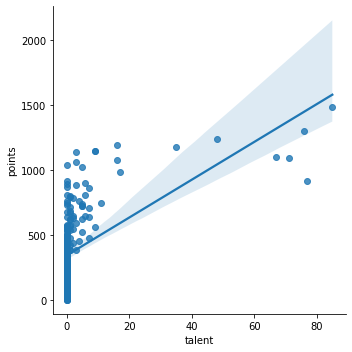

In [ ]:
sns.lmplot(x = "talent", y = "points", data = talent)

The data is evidently not linear. So let's try the logarithmic transform. 

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


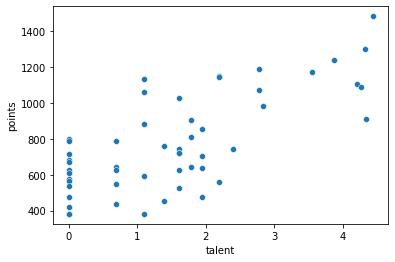

In [ ]:
sns.scatterplot(x = np.log(talent['talent']), y = "points", data = talent)

We see the error since plenty of the `talent` are `0`, weirdly enough. We can fix this by adding one to every observation.


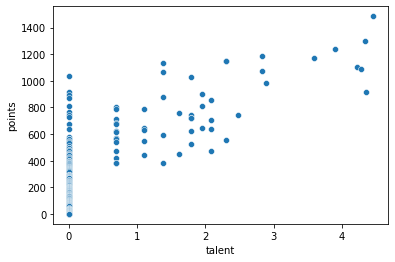

In [67]:
sns.scatterplot(x = np.log(talent['talent'] + 1), y = "points", data = talent, x_jitter = 0.3)

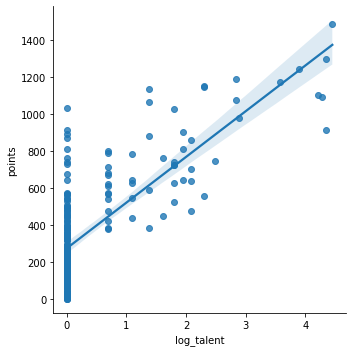

In [70]:
talent["log_talent"] = np.log(talent["talent"] + 1)
sns.lmplot(x = "log_talent", y = "points", data = talent)

This seams quite linear!

In [ ]:
import statsmodels.formula.api as smf
fit = smf.ols(formula = 'points ~ np.log(talent + 1)', data=talent).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     268.8
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           3.30e-39
Time:                        11:01:10   Log-Likelihood:                -1408.4
No. Observations:                 208   AIC:                             2821.
Df Residuals:                     206   BIC:                             2828.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            273.8867     16.311     16.791      0.000     241.729     306.045
np.log(talent + 1)   247.0227     15.068     16.394      0.000     217.315     276.730
==============================================================================
Omnibus:                       25.340   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.640
Skew:                           0.874   Prob(JB):                     2.22e-07
Kurtosis:                       3.692   Cond. No.                         1.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's try a quadratic function instead, which the authors of the paper did, by the way.


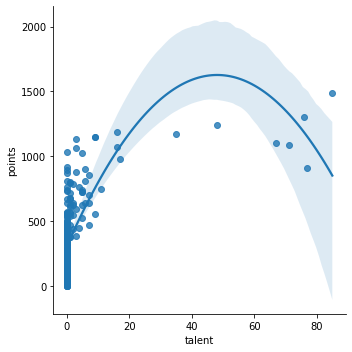

In [ ]:
sns.lmplot(x = "talent", y = "points", data = talent, order = 2)

The fitted function is "U-shaped". It appears that `points` first increases in `talent`, then decreases. At least when you look at the fitted curve. 

In [ ]:
fit = smf.ols(formula = 'points ~ talent + I(talent ** 2)', data=talent).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     88.87
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           1.61e-28
Time:                        11:07:25   Log-Likelihood:                -1430.3
No. Observations:                 208   AIC:                             2867.
Df Residuals:                     205   BIC:                             2877.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        305.3440     17.627     17.323      0.000     270.591     340.097
talent            54.8979      5.469     10.039      0.000      44.116      65.680
I(talent ** 2)    -0.5702      0.075     -7.604      0.000      -0.718      -0.422
==============================================================================
Omnibus:                       18.548   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.285
Skew:                           0.781   Prob(JB):                     2.39e-05
Kurtosis:                       3.128   Cond. No.                         988.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Note:* Be aware that the `I` in `I(talent ** 2)` is needed, as  `statsmodels` does not interpret `x ** 2` in the standard way.

Not surprisingly, the quadratic model has a smaller $R^2$ than the log-linear model. Along with just looking at the data, this provides evidence that there is no "U-shape" between talent and performance, but an increasing relationsship. Just as you'd expect!



### The moral of the story
1. Always look at the data. If it doesn't look like it supports your hypothesis, it probably does not.
2. Try out different models, some might fit much better the others.
3. Do not blindly trust the qualitative consequences of models. Even if the quadratic model had a better fit than the log-model, it wouldn't provide strong evidence for a U-shape -- for a quadratic curve must be U-shaped!

Even when $X$ is univariate, it's often hard to find regression functions that fits the data better than a log-transform or just an ordinary linear regression. Manually going through other functions such as the quadratic function is a hassle, and typically leads to poor results. Later on, we will talk about how to construct "smart" functions that approximate almost any data reasonably well.

## Summary
1. A regression model is on the form $Y = f(X;\beta) + \epsilon$ for some regression function $f$.
2. In the multiple linear regression model, $X$ is vector, and the regression function is $f(X;\beta) = \beta_0 + \beta_1 X_1 + ... + \beta_p X_p$.
3. There are two interpretations of the regression coefficients $\beta_i$ in a linear regression model.
4. The multiple linear regression function may be interpreted as the equation for a line when $p=1$, a plane when $p=2$, and a hyperplane when $p>2$.
4. The quadratic regresion model $Y = c + bX + aX^2 + \epsilon$ is an example of a multiple linear regression model. It is frequently used due to its simplicity, but should be treated with suspicion.
5. `statsmodels.formula.api` may be used to calculate multiple linear regression models.